In [23]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [16]:
# Define helper functions

def print_at_index(idx):
    """Prints relevant information on tweet record at a given index."""
    tweet = data.iloc[idx]
    print(tweet['Candidate'])
    print(tweet['Cleaned Tweet Text'])
    print(round(tweet['Sentiment Score'], 2), tweet['Sentiment Bucket'])
    

## Load tweet-level data and assemble summary statistics for plotting

In [19]:
# Load data
data = pd.read_csv('all_candidates.csv')
data

#print_at_index(29739)

,Unnamed: 0,Date,Favorite Count,Retweet Count,Tweet Text,Candidate,Cleaned Tweet Text,Sentiment Score,Sentiment Bucket
0,792,2019-05-02,1,1,b'@tedcruz Michael Bennet molly whopped you on...,bennet,Michael Bennet molly whopped you on the Senate...,0.000000,Neutral
1,793,2019-05-02,0,0,b'Sen. Michael Bennet announces a 2020 preside...,bennet,Sen Michael Bennet announces a 2020 presidenti...,0.000000,Neutral
2,794,2019-05-02,0,0,b'Senator Michael Bennet Announces Presidentia...,bennet,Senator Michael Bennet Announces Presidential ...,0.000000,Neutral
3,795,2019-05-02,4,1,b'Colorado Sen. Michael Bennet announces 2020 ...,bennet,Colorado Sen Michael Bennet announces 2020 cam...,0.400000,Positive
4,796,2019-05-02,0,0,b'Colorado Senator Michael Bennet announces 20...,bennet,Colorado Senator Michael Bennet announces 2020...,0.000000,Neutral
5,797,2019-05-02,0,0,b'&lt;em&gt;The Atlantic&lt;/em&gt; Politics &...,bennet,&lt;em&gt;The Atlantic&lt;/em&gt Politics &amp...,-0.083333,Negative
6,798,2019-05-02,0,0,b'Pretty much: https://t.co/FurhH9uBuG',bennet,Pretty much,0.225000,Positive
7,799,2019-05-02,0,0,"b""Michael Bennet Enters 2020 Race -- 'My Plan ...",bennet,Michael Bennet Enters 2020 Race My Plan Is to...,0.000000,Neutral
8,800,2019-05-02,0,0,b'The Atlantic Politics &amp; Policy Daily: Le...,bennet,The Atlantic Politics &amp Policy Daily Less I...,-0.083333,Negative
9,801,2019-05-02,1,1,b'One reason Ted Cruz is attack Michael Bennet...,bennet,One reason Ted Cruz is attack Michael Bennet B...,0.000000,Neutral


In [20]:
# Count tweets in each sentiment bucket
snowman_counts = pd.DataFrame(data.groupby(['Candidate', 'Sentiment Bucket']).count()['Sentiment Score'])
snowman_mean = pd.DataFrame(data.groupby(['Candidate', 'Sentiment Bucket']).mean())

snowman_plot = pd.DataFrame()
snowman_plot['Count of Tweets'] = snowman_counts['Sentiment Score']
snowman_plot['Average Sentiment Score'] = snowman_mean['Sentiment Score']
snowman_plot

df = snowman_plot
df = df.sort_values(by = ['Count of Tweets'], ascending = False)
df = df.reset_index()

Count of Tweets  Average Sentiment Score
Candidate Sentiment Bucket                                          
bennet    Negative                      191                -0.198381
          Neutral                      1198                 0.000000
          Positive                      677                 0.328646
biden     Negative                     2339                -0.296506
          Neutral                      5818                 0.000000
          Positive                     3526                 0.307543
booker    Negative                      137                -0.296716
          Neutral                       442                 0.000000
          Positive                      431                 0.342465
buttigieg Negative                      267                -0.271072
          Neutral                      1005                 0.000000
          Positive                     1030                 0.365405
castro    Negative                       16                -0.157453
          Neutral                        77                 0.000000
          Positive                       54                 0.312086
delaney   Negative                       10                -0.327917
          Neutral                        40                 0.000000
          Positive                       16                 0.388737
gabbard   Negative                       80                -0.230799
          Neutral                       288                 0.000000
          Positive                      191                 0.316773
harris    Negative                     1406                -0.528226
          Neutral                      2381                 0.000000
          Positive                     1864                 0.328733
sanders   Negative                      794                -0.263670
          Neutral                      1869                 0.000000
          Positive                     1370                 0.317908
warren    Negative                      320                -0.279851
          Neutral                      1147                 0.000000
          Positive                      777                 0.327827

In [96]:
# Assemble x axis plot labels

def trim_dupes(my_list):
    return list(dict.fromkeys(my_list))

x = trim_dupes(df['Candidate'])
x


['biden',
 'harris',
 'sanders',
 'bennet',
 'warren',
 'buttigieg',
 'booker',
 'gabbard',
 'castro',
 'delaney']

In [87]:
df = snowman_plot
#df = df.reset_index()

df.sort_values(by = ['Count of Tweets'], ascending = False)

Count of Tweets  Average Sentiment Score
Candidate Sentiment Bucket                                          
biden     Neutral                      5818                 0.000000
          Positive                     3526                 0.307543
harris    Neutral                      2381                 0.000000
biden     Negative                     2339                -0.296506
sanders   Neutral                      1869                 0.000000
harris    Positive                     1864                 0.328733
          Negative                     1406                -0.528226
sanders   Positive                     1370                 0.317908
bennet    Neutral                      1198                 0.000000
warren    Neutral                      1147                 0.000000
buttigieg Positive                     1030                 0.365405
          Neutral                      1005                 0.000000
sanders   Negative                      794                -0.263670
warren    Positive                      777                 0.327827
bennet    Positive                      677                 0.328646
booker    Neutral                       442                 0.000000
          Positive                      431                 0.342465
warren    Negative                      320                -0.279851
gabbard   Neutral                       288                 0.000000
buttigieg Negative                      267                -0.271072
bennet    Negative                      191                -0.198381
gabbard   Positive                      191                 0.316773
booker    Negative                      137                -0.296716
gabbard   Negative                       80                -0.230799
castro    Neutral                        77                 0.000000
          Positive                       54                 0.312086
delaney   Neutral                        40                 0.000000
          Positive                       16                 0.388737
castro    Negative                       16                -0.157453
delaney   Negative                       10                -0.327917

Saved plot as 'snowman.png'.


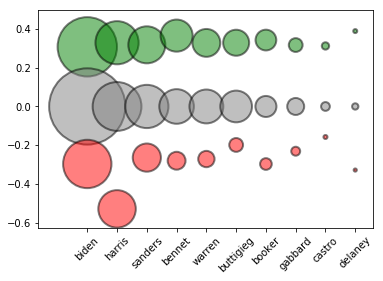

In [97]:
# Assemble bubble values for plotting

df = snowman_plot
df = df.sort_values(by = ['Count of Tweets'], ascending = False)
df = df.reset_index()

def plot_sentiment_bucket(my_sentiment_bucket, my_color):
    d = df.loc[df['Sentiment Bucket'] == my_sentiment_bucket]
    
    y = d['Average Sentiment Score'].values
    y.reshape(len(x),1)
    
    # Assign bubble sizes based on Count of Tweets
    s = d['Count of Tweets'].values

    # Reshape for plotting
    s = np.asarray(s).reshape(len(x),1)
    
    # Make plot
    plt.scatter(x, y, s, my_color, alpha=0.5, linewidths=2,edgecolors='black')
    plt.xticks(rotation=45)

sentiment_color = {
    'Positive': 'green',
    'Neutral': 'grey',
    'Negative': 'red',
}

for sentiment in sentiment_color.keys():
    plot_sentiment_bucket(sentiment, sentiment_color[sentiment])
    
file_name = 'snowman.png'
plt.savefig(file_name)
print(f"Saved plot as '{file_name}'.")
plt.show()
